## Problem Statement
''' The main objective of this case study is to check whether the patient with diabetes will be readmitted to the hospital within 30 days.'''

### Data

##### Data overview:

'''Get the data from : https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008#

The dataset represents 10 years (1999–2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria.'''

'''(1) It is an inpatient encounter (a hospital admission).
(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
(3) The length of stay was at least 1 day and at most 14 days.
(4) Laboratory tests were performed during the encounter.
(5) Medications were administered during the encounter.

The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.
We will be looking into each of the 50 features in detail when we perform exploratory data analysis.'''

#### Target variable: Readmitted

### Error metric : AUC(Area under curve) score.

In [1]:
# loading the libraries 

In [1]:
import pandas as pd 
import numpy as np #for mathematical calculation
import matplotlib
%matplotlib inline 
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import  GridSearchCV #for hyperparameter training 

from sklearn.metrics import roc_auc_score
pd.set_option('display.max_rows',None)

Matplotlib is building the font cache; this may take a moment.


In [2]:
train=pd.read_csv('diabetic_data_target.csv') # train data 

In [3]:
test=pd.read_csv('new_data.csv') # target data 

In [4]:
admission_type_id={1 : 'Emergency',
2 : 'Urgent',
3 : 'Elective',
4 : 'Newborn',
5 : 'Not Available',
6 : 'missing',
7 : 'Trauma Center',
8 : 'Not Mapped'
}


In [5]:
admission_source_id ={1 : ' Physician Referral',
2 : 'Clinic Referral',
3 : 'HMO Referral',
4 : 'Transfer from a hospital',
5 : ' Transfer from a Skilled Nursing Facility (SNF)',
6 : ' Transfer from another health care facility',
7 : ' Emergency Room',
8 : ' Court/Law Enforcement',
9 : ' Not Available',
10 : ' Transfer from critial access hospital',
11 : 'Normal Delivery',
12 : ' Premature Delivery',
13 : ' Sick Baby',
14 : ' Extramural Birth',
15 : 'Not Available',
17 : 'null',
18 : ' Transfer From Another Home Health Agency',
19 : 'Readmission to Same Home Health Agency',
20 : ' Not Mapped',
21 : 'Unknown/Invalid',
22 : ' Transfer from hospital inpt/same fac reslt in a sep claim',
23 : ' Born inside this hospital',
24 : ' Born outside this hospital',
25 : ' Transfer from Ambulatory Surgery Center',
26 : 'Transfer from Hospice'}

In [6]:
discharge_disposition_id={1 : 'Discharged to home',
2 : 'Discharged/transferred to another short term hospital',
3 : 'Discharged/transferred to SNF',
4 : 'Discharged/transferred to ICF',
5 : 'Discharged/transferred to another type of inpatient care institution',
6 : 'Discharged/transferred to home with home health service',
7 : 'Left AMA',
8 : 'Discharged/transferred to home under care of Home IV provider',
9 : 'Admitted as an inpatient to this hospital',
10 : 'Neonate discharged to another hospital for neonatal aftercare',
11 : 'Expired',
12 : 'Still patient or expected to return for outpatient services',
13 : 'Hospice / home',
14 : 'Hospice / medical facility',
15 : 'Discharged/transferred within this institution to Medicare approved swing bed',
16 : 'Discharged/transferred/referred another institution for outpatient services',
17 : 'Discharged/transferred/referred to this institution for outpatient services',
18 : 'null',
19 : 'Expired at home. Medicaid only, hospice.',
20 : 'Expired in a medical facility. Medicaid only, hospice.',
21 : 'Expired, place unknown. Medicaid only, hospice.',
22 : 'Discharged/transferred to another rehab fac including rehab units of a hospital .',
23 : 'Discharged/transferred to a long term care hospital.',
24 : 'Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.',
25 : 'Not Mapped',
26 : 'Unknown/Invalid',
30 : 'Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere',
27 : 'Discharged/transferred to a federal health care facility.',
28 : 'Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital',
29 : 'Discharged/transferred to a Critical Access Hospital (CAH).'
}

In [7]:
print('Rows and columns of train',train.shape)
print('Rows and columns of test',test.shape)

Rows and columns of train (100766, 47)
Rows and columns of test (500, 46)


###### Combining test and train data

In [8]:
df=train.append([test])

###### We will map admssion_type_id , 'discharge_disposition_id', 'admission_source_id'  . If we don't map them then  model will treat numerical category as ordinal  variable. 

In [9]:
df['admission_type_id']=df['admission_type_id'].map(admission_type_id)

In [10]:
df['discharge_disposition_id']=df['discharge_disposition_id'].map(discharge_disposition_id)



In [11]:
df['admission_source_id']=df['admission_source_id'].map(admission_source_id)


In [12]:
df.shape

(101266, 47)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101266 entries, 0 to 499
Data columns (total 47 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   encounter_id              101266 non-null  int64  
 1   patient_nbr               101266 non-null  int64  
 2   race                      101266 non-null  object 
 3   gender                    101266 non-null  object 
 4   age                       101266 non-null  object 
 5   weight                    101266 non-null  object 
 6   admission_type_id         101266 non-null  object 
 7   discharge_disposition_id  101266 non-null  object 
 8   admission_source_id       101266 non-null  object 
 9   time_in_hospital          101266 non-null  int64  
 10  payer_code                101266 non-null  object 
 11  medical_specialty         101266 non-null  object 
 12  num_lab_procedures        101266 non-null  int64  
 13  num_procedures            101266 non-null  int6

In [14]:
df.isnull().sum() # No missing value in the data 

encounter_id                  0
patient_nbr                   0
race                          0
gender                        0
age                           0
weight                        0
admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
payer_code                    0
medical_specialty             0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
number_diagnoses              0
max_glu_serum                 0
A1Cresult                     0
metformin                     0
repaglinide                   0
nateglinide                   0
chlorpropamide                0
glimepiride                   0
acetohexamide                 0
glipizide                     0
glyburide                     0
tolbutamide                   0
pioglitazone                  0
rosiglit

In [15]:
df['readmitted'].value_counts(normalize=True) # checking the value count of Y variable 
# Y variable is balanced

0.0    0.538207
1.0    0.461793
Name: readmitted, dtype: float64

In [16]:
df.nunique() ## checking the number of unique values in each column 

encounter_id                101266
patient_nbr                  71224
race                             6
gender                           3
age                             10
weight                          10
admission_type_id                8
discharge_disposition_id        26
admission_source_id             17
time_in_hospital                14
payer_code                      18
medical_specialty               73
num_lab_procedures             118
num_procedures                   7
num_medications                 75
number_outpatient               39
number_emergency                33
number_inpatient                21
number_diagnoses                16
max_glu_serum                    4
A1Cresult                        4
metformin                        4
repaglinide                      4
nateglinide                      4
chlorpropamide                   4
glimepiride                      4
acetohexamide                    2
glipizide                        4
glyburide           

## 1. Data exploration and preprocessing 

In [17]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [29]:
#There are total 101766 encounters and there are 71518 patient nbr number. Encounter id and patient nbr are personalized information of patient therefore we will drop them but patient nbr no. is unique 
# provided for life time by hospital but encounter id is egnerated whenever person visit the hospital. So, in given data  
# patient with unique patient nbr number has multiple encounters therefore we will drop the rows that have multiple patient 
# encounter of same patient. we will keep single encounter of single patient 

In [18]:

duplicate = df[df.duplicated(['patient_nbr', 'readmitted'])]
print(duplicate.shape)

(17939, 47)


#### There are 17939 people who have same readmission status with . We will drop these rows and keep the last one

In [19]:
# dropping the duplicated rows and keeping the most recent one 
df.drop_duplicates(subset=['patient_nbr','readmitted'], keep='last', inplace=True)
print(df.shape)

(83327, 47)


In [20]:
# Print the number of unique values for each feature column
df.nunique()

encounter_id                83327
patient_nbr                 71224
race                            6
gender                          3
age                            10
weight                         10
admission_type_id               8
discharge_disposition_id       26
admission_source_id            17
time_in_hospital               14
payer_code                     18
medical_specialty              72
num_lab_procedures            118
num_procedures                  7
num_medications                73
number_outpatient              33
number_emergency               28
number_inpatient               17
number_diagnoses               16
max_glu_serum                   4
A1Cresult                       4
metformin                       4
repaglinide                     4
nateglinide                     4
chlorpropamide                  4
glimepiride                     4
acetohexamide                   2
glipizide                       4
glyburide                       4
tolbutamide   

In [21]:
list_of_medicines=['metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed']

In [22]:
for i in list_of_medicines:
    print(i,df[i].unique()) ## checking the categories of every medicine 

metformin ['No' 'Steady' 'Up' 'Down']
repaglinide ['No' 'Steady' 'Down' 'Up']
nateglinide ['No' 'Steady' 'Up' 'Down']
chlorpropamide ['No' 'Steady' 'Down' 'Up']
glimepiride ['No' 'Steady' 'Down' 'Up']
acetohexamide ['No' 'Steady']
glipizide ['No' 'Steady' 'Up' 'Down']
glyburide ['No' 'Steady' 'Up' 'Down']
tolbutamide ['No' 'Steady']
pioglitazone ['No' 'Steady' 'Up' 'Down']
rosiglitazone ['No' 'Steady' 'Up' 'Down']
acarbose ['No' 'Steady' 'Up' 'Down']
miglitol ['No' 'Steady' 'Down' 'Up']
troglitazone ['No' 'Steady']
tolazamide ['No' 'Steady' 'Up']
examide ['No']
citoglipton ['No']
insulin ['No' 'Up' 'Steady' 'Down']
glyburide-metformin ['No' 'Steady' 'Down' 'Up']
glipizide-metformin ['No' 'Steady']
glimepiride-pioglitazone ['No']
metformin-rosiglitazone ['No' 'Steady']
metformin-pioglitazone ['No' 'Steady']
change ['No' 'Ch']
diabetesMed ['No' 'Yes']


In [23]:
#examide and citoglipton medicine,glimepiride-pioglitazone has only value 'none' i.e. medicine not prescribed.  Therefore we can't study the impact whether change in this medicine 
# has effected the readmission of patient.WE are also dropping patient nbr and encounter id 
df.drop(['citoglipton','examide','glimepiride-pioglitazone','patient_nbr','encounter_id'],axis=1,inplace=True)
print(df.shape)

(83327, 42)


In [24]:
## age is in object form that's why we need to change its datatype from object to int 
## in this regard we are replacing age bracket with its median like (10-20)=10

In [25]:
age_id={'[0-10)':5,
'[10-20)':15,
'[20-30)':25,
'[30-40)':35,
'[40-50)':45,
'[50-60)':55,
'[60-70)':65,
'[70-80)':75,
'[80-90)':85,
'[90-100)':95}
df['age']=df['age'].map(age_id)## removing [] between age 


In [26]:
df['A1Cresult'].unique() ## removing greater sign from digit 


array(['None', '>7', '>8', 'Norm'], dtype=object)

In [27]:
df['A1Cresult']=df['A1Cresult'].replace('>7','greater than 7')
df['A1Cresult']=df['A1Cresult'].replace('>8','greater than 8')
df['A1Cresult'].unique()

array(['None', 'greater than 7', 'greater than 8', 'Norm'], dtype=object)

####age and weight are in object form that's why we need to change its datatype to int.


### 1.1 Univariate Analysis 

### Race

<AxesSubplot:xlabel='race', ylabel='count'>

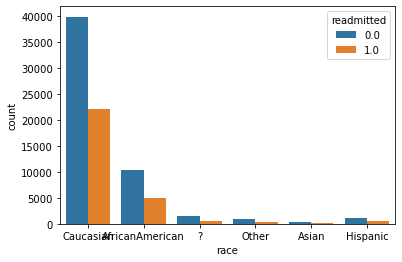

In [41]:
sns.countplot(x=df['race'],data=df,hue=df['readmitted'])

## caucasian race and african american is readmitted more

### Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

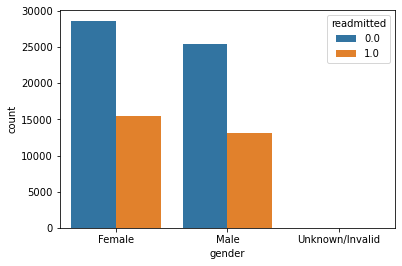

In [42]:
sns.countplot(x=df['gender'],data=df,hue=df['readmitted'])
# female required more care than man as more female are being readmitted 

### A1cresult

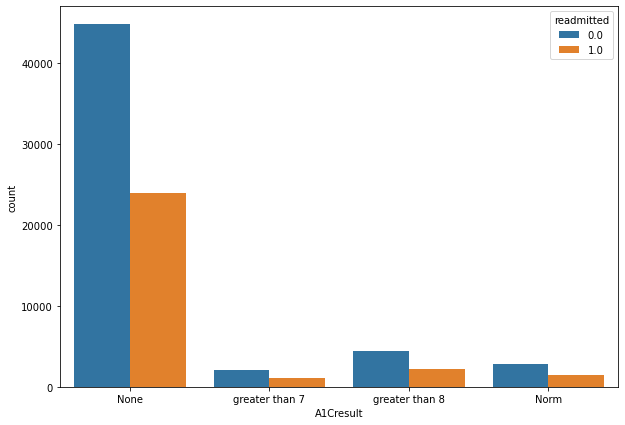

In [30]:
plt.figure(figsize = (10,7))
ax=sns.countplot(x=df['A1Cresult'],data=df,hue=df['readmitted'])

#  A1cresult countplot shows more test should be conducted as people on whom test is not done has higher chance of being readmitted 

### max_glu_serum

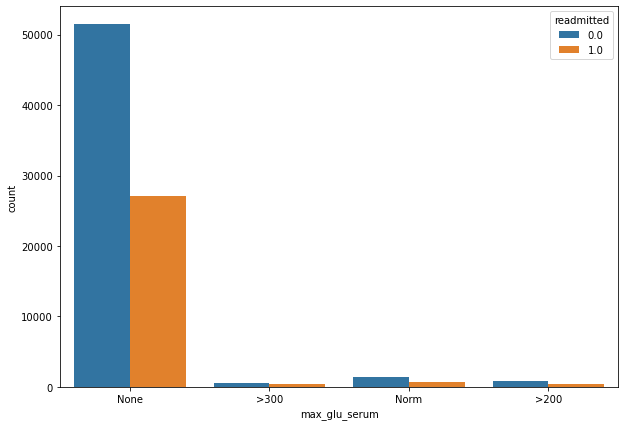

In [31]:
plt.figure(figsize = (10,7))
ax=sns.countplot(x=df['max_glu_serum'],data=df,hue=df['readmitted'])
# People who has not done the test has hihger  chance of being readmitted 

### num_lab_procedures

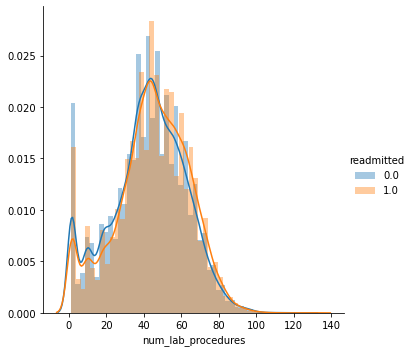

In [46]:

sns.FacetGrid(df,hue='readmitted', size=5 ).map(sns.distplot,'num_lab_procedures').add_legend()

mn = df['num_lab_procedures'].mean()
md = df['num_lab_procedures'].median()
print('mean and median of num_lab_procedures is {:.2f} and {:.2f} respectively'.format(mn,md))


#### The distribution of number of lab procedures for both readmitted patients and non-readmitted patients is same but, as these features have considerable variation, they will prove to be useful for model to find patterns in overall complete training data

In [49]:
mn = df['num_lab_procedures'].mean()
md = df['num_lab_procedures'].median()
print('mean and median of num_lab_procedures is {:.2f} and {:.2f} respectively'.format(mn,md))

mean and median of num_lab_procedures is 43.15 and 44.00 respectively


#### The distribution of number of lab procedures for both readmitted patients and non-readmitted patients is same but, as these features have considerable variation, they will prove to be useful for model to find patterns in overall complete training data.

### number_inpatient with 

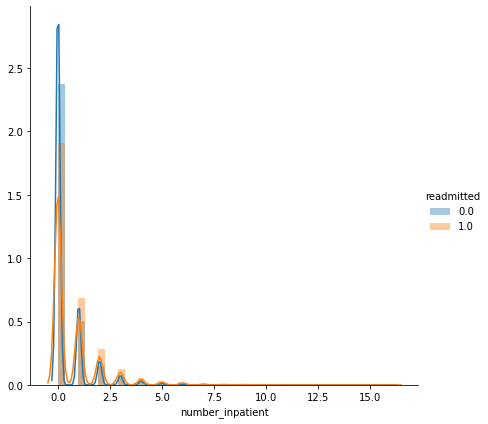

In [51]:
sns.FacetGrid(df,hue='readmitted', size=6 ).map(sns.distplot,'number_inpatient').add_legend()

#####  Patients with number_inpatient count as 0 seem to have significantly low readmission rate. Let's confirm the same with countplot.

<AxesSubplot:xlabel='number_inpatient', ylabel='count'>

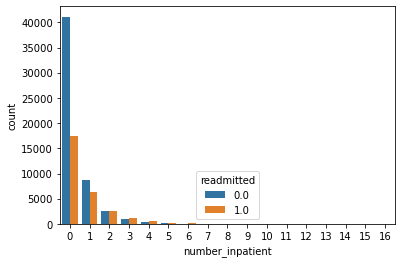

In [52]:
sns.countplot(df['number_inpatient'], hue=df['readmitted'])

#### Patients who were not readmitted again mostly have '0' inpatient count. 'number-inpatient' is therefore an important factor in determining the readmission status.

### Age

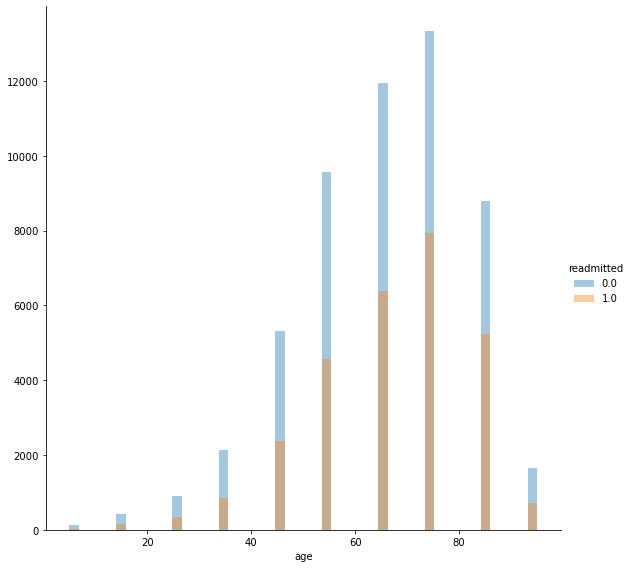

In [53]:
sns.FacetGrid(df,hue='readmitted', size=8 ).map(sns.distplot,'age', kde=False).add_legend()

#### We can see patients with age in range 60-80 are more likely to fall ill and get admitted. However, we cannot make any conclusion about readmission status as the distribution of patients who were readmitted and otherwise is same.

### 1.2 Bivariate Analysis

In [54]:
## analysis of continuous variable 

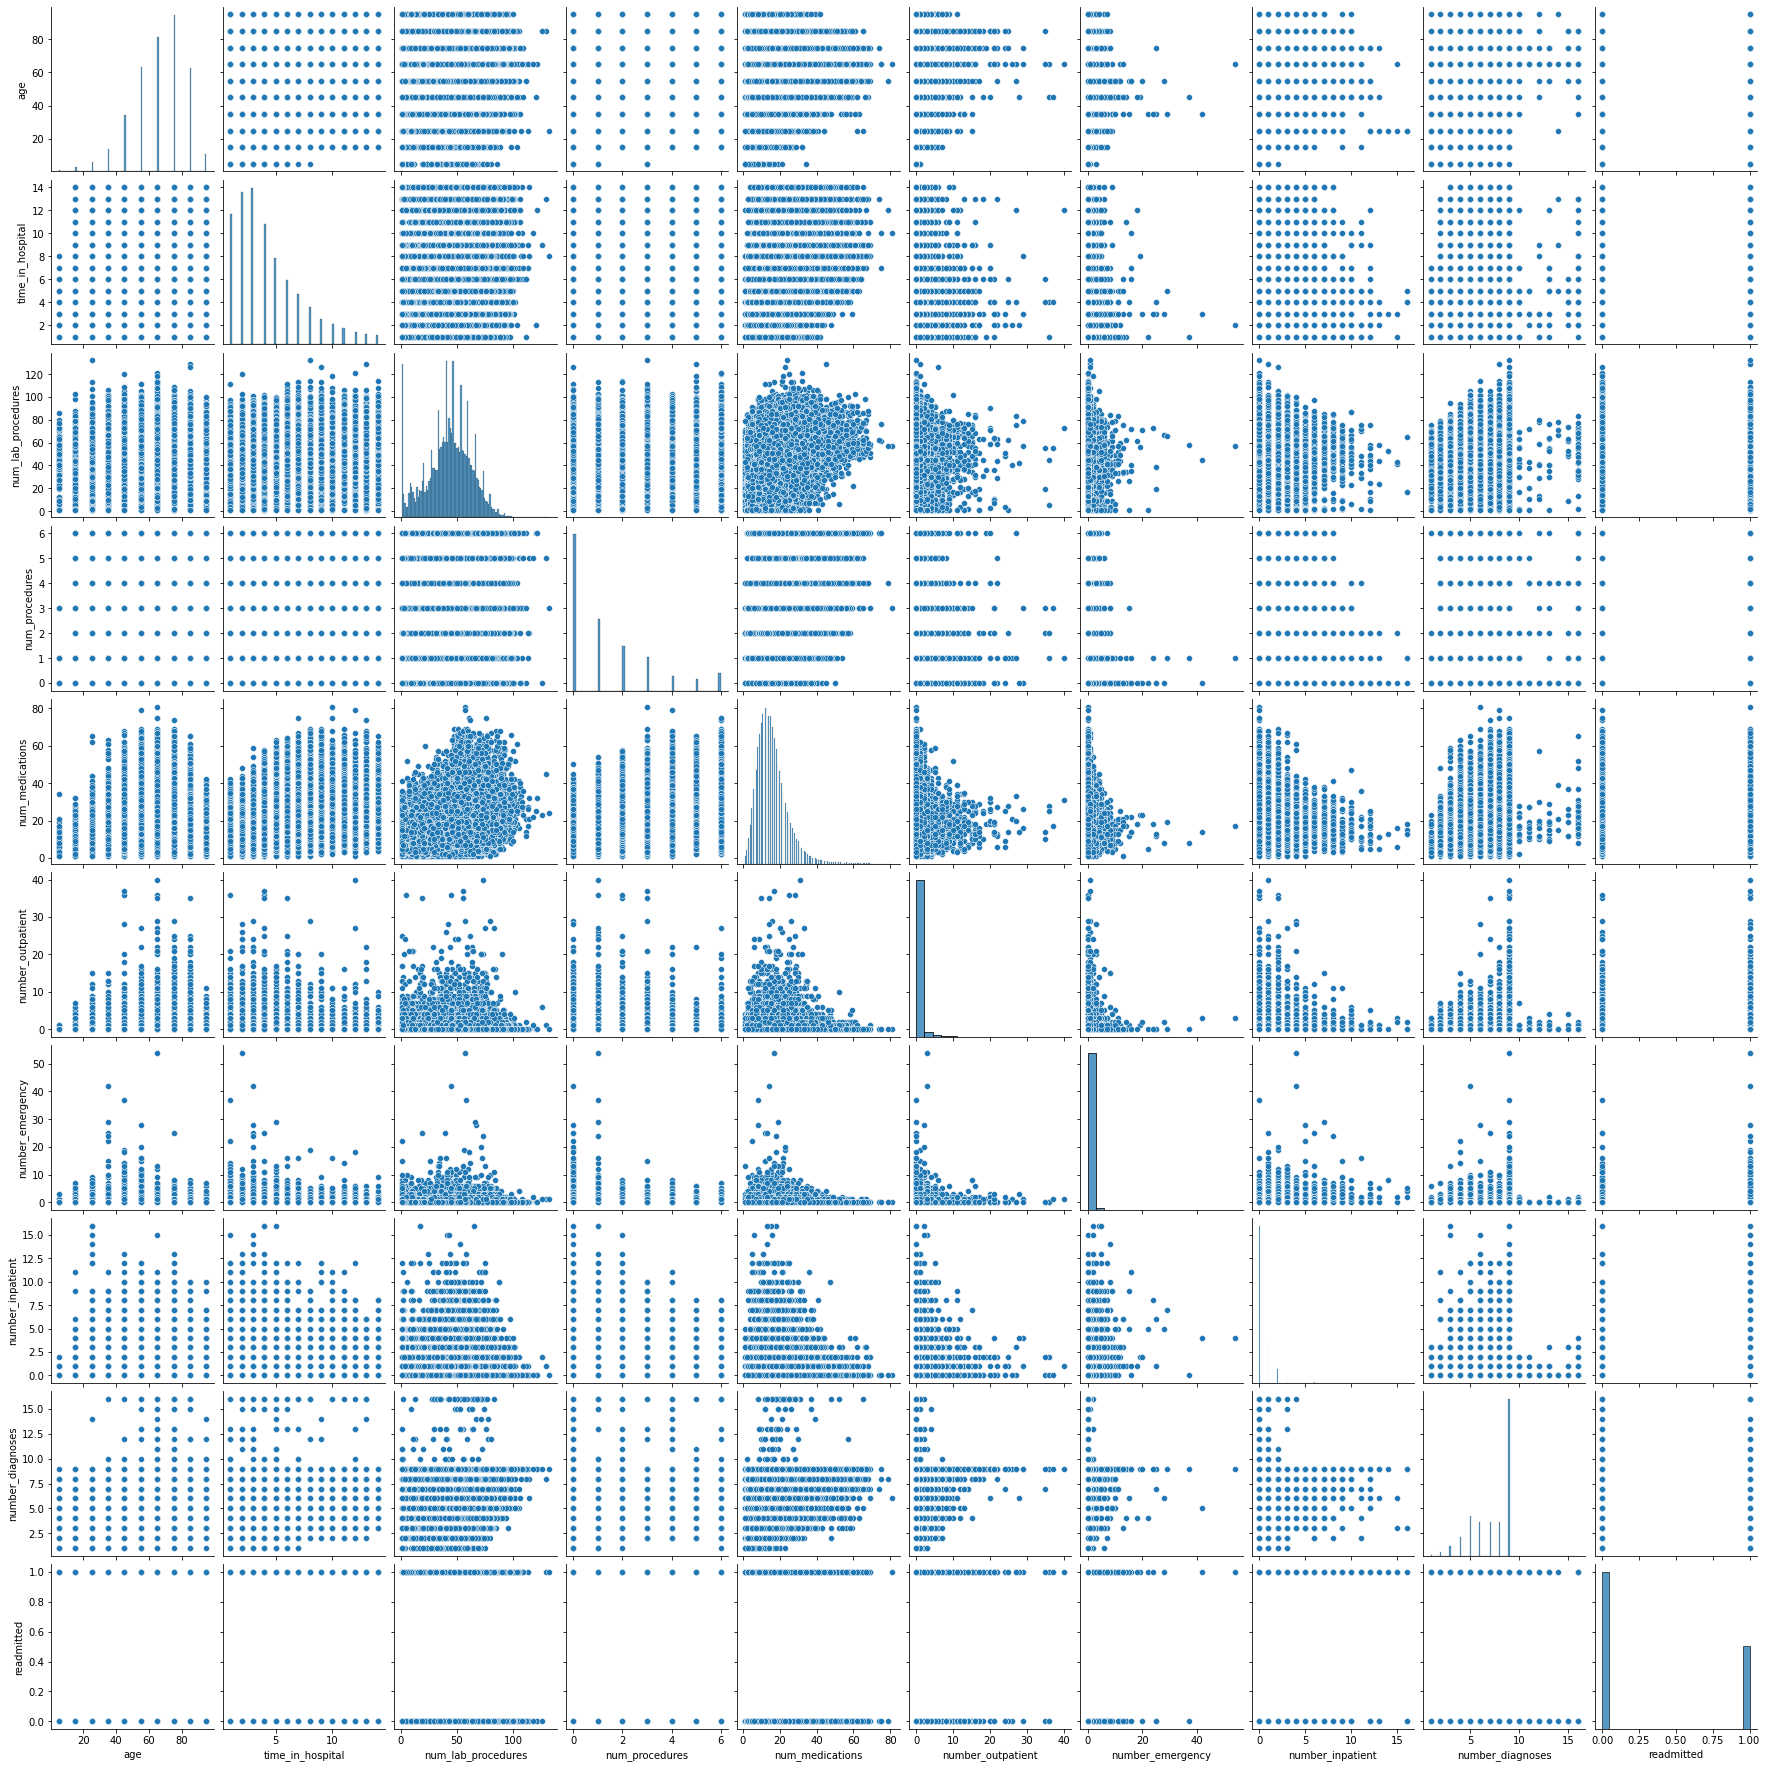

In [55]:
sns.pairplot(df)

In [56]:
df.corr()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
age,1.000000,0.125763,0.032747,-0.035646,0.050074,0.029868,-0.051907,0.019850,0.256367,0.051178
time_in_hospital,0.125763,1.000000,0.324952,0.179596,0.464371,-0.009741,-0.004539,0.085419,0.224500,0.043602
num_lab_procedures,0.032747,0.324952,1.000000,0.051218,0.262098,-0.013246,0.009249,0.045456,0.156610,0.053130
num_procedures,-0.035646,0.179596,0.051218,1.000000,0.394202,-0.021605,-0.043988,-0.060650,0.072946,-0.021422
num_medications,0.050074,0.464371,0.262098,0.394202,1.000000,0.036346,0.011499,0.060573,0.257257,0.036786
number_outpatient,0.029868,-0.009741,-0.013246,-0.021605,0.036346,1.000000,0.092980,0.095047,0.090723,0.069390
number_emergency,-0.051907,-0.004539,0.009249,-0.043988,0.011499,0.092980,1.000000,0.210400,0.061866,0.076070
number_inpatient,0.019850,0.085419,0.045456,-0.060650,0.060573,0.095047,0.210400,1.000000,0.116543,0.157614
number_diagnoses,0.256367,0.224500,0.156610,0.072946,0.257257,0.090723,0.061866,0.116543,1.000000,0.096941
readmitted,0.051178,0.043602,0.053130,-0.021422,0.036786,0.069390,0.076070,0.157614,0.096941,1.000000


<AxesSubplot:xlabel='readmitted', ylabel='number_inpatient'>

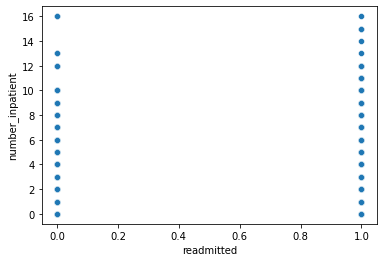

In [57]:
sns.scatterplot(y='number_inpatient',x='readmitted',data=df)
## readmitted and number_inpatient are positively corelated 

<AxesSubplot:xlabel='readmitted', ylabel='number_outpatient'>

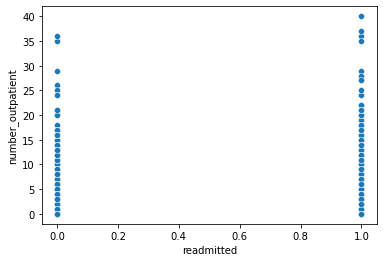

In [58]:
sns.scatterplot(y='number_outpatient',x='readmitted',data=df)
## only two numerical variable are  relevsnt for readmitted , we can drop all the other numarical variable 

### 1.3 Treatment of missing values 

In [59]:
## No missing values in data 
df.isnull().sum()

race                          0
gender                        0
age                           0
weight                        0
admission_type_id             0
discharge_disposition_id      0
admission_source_id           0
time_in_hospital              0
payer_code                    0
medical_specialty             0
num_lab_procedures            0
num_procedures                0
num_medications               0
number_outpatient             0
number_emergency              0
number_inpatient              0
number_diagnoses              0
max_glu_serum                 0
A1Cresult                     0
metformin                     0
repaglinide                   0
nateglinide                   0
chlorpropamide                0
glimepiride                   0
acetohexamide                 0
glipizide                     0
glyburide                     0
tolbutamide                   0
pioglitazone                  0
rosiglitazone                 0
acarbose                      0
miglitol

In [60]:
## there are question marks in data variables
miscols=[]
for i in df.columns:
    if '?' in df[i].unique():
        miscols.append(i)

In [61]:
miscols

['race', 'weight', 'payer_code', 'medical_specialty']

In [62]:
df['race'].value_counts()/df['race'].count()*100
# race has 2% '?'' mark

Caucasian          74.751281
AfricanAmerican    18.463403
?                   2.502190
Hispanic            2.046156
Other               1.557718
Asian               0.679252
Name: race, dtype: float64

In [63]:
df['weight'].value_counts()/df['weight'].count()*100
# question mark is higher than 96% therefore we will drop it

?            96.492133
[75-100)      1.472512
[50-75)       0.978074
[100-125)     0.690052
[125-150)     0.158412
[25-50)       0.106808
[0-25)        0.048004
[150-175)     0.038403
[175-200)     0.013201
>200          0.002400
Name: weight, dtype: float64

In [65]:
df['payer_code'].value_counts()/df['payer_code'].count()*100
## payer code has 39% '?'' mark

?     41.199131
MC    30.799141
HM     5.828843
BC     4.710358
SP     4.571147
MD     3.236646
CP     2.577796
UN     2.547794
CM     1.938147
OG     0.945672
PO     0.626448
DM     0.505238
CH     0.157212
WC     0.153612
OT     0.088807
MP     0.066005
SI     0.046804
FR     0.001200
Name: payer_code, dtype: float64

In [66]:
df['medical_specialty'].value_counts()/df['medical_specialty'].count()*100
## medical speciality has 48 percent question mark 

?                                       48.108056
InternalMedicine                        15.190754
Family/GeneralPractice                   7.198147
Emergency/Trauma                         6.704910
Cardiology                               5.645229
Surgery-General                          3.111836
Orthopedics                              1.500114
Orthopedics-Reconstructive               1.384905
Nephrology                               1.383705
Radiologist                              1.152088
Pulmonology                              0.872466
Psychiatry                               0.854465
ObstetricsandGynecology                  0.762058
Surgery-Cardiovascular/Thoracic          0.708054
Urology                                  0.702053
Surgery-Neuro                            0.542441
Gastroenterology                         0.542441
Surgery-Vascular                         0.504038
PhysicalMedicineandRehabilitation        0.390030
Oncology                                 0.338426


In [67]:
# we will drop the weight since 98% values are ?
df=df.drop('weight',axis=1)

In [68]:
df=df.replace('?',np.nan)

In [69]:
df.isnull().sum()

race                         2085
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  34330
medical_specialty           40087
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide                     0
pioglitazone                    0
rosiglitazone                   0
acarbose      

In [70]:
# we have made a separate category for missing values as 'unk' as an alternate to dropping the missing values.
# we will use algorithms that can handle missing values like DT rf, xg boost
df['race']=df['race'].fillna('UNK')
df['payer_code']= df['payer_code'].fillna('UNK')
df['medical_specialty']=df['medical_specialty'].fillna('UNK')

### 1.4 Feature engineering

In [71]:
print('Number of medical speciality', df.medical_specialty.unique())

Number of medical speciality ['Pediatrics-Endocrinology' 'UNK' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surgery-General' 'Orthopedics'
 'Gastroenterology' 'Nephrology' 'Orthopedics-Reconstructive'
 'Surgery-Cardiovascular/Thoracic' 'Emergency/Trauma' 'Pulmonology'
 'Psychiatry' 'Surgery-Neuro' 'Obsterics&Gynecology-GynecologicOnco'
 'ObstetricsandGynecology' 'Pediatrics' 'Otolaryngology'
 'Surgery-Colon&Rectal' 'Pediatrics-CriticalCare' 'Urology'
 'Psychiatry-Child/Adolescent' 'Endocrinology' 'Neurology'
 'Anesthesiology-Pediatric' 'Radiology' 'Hematology/Oncology'
 'Pediatrics-Hematology-Oncology' 'Psychology' 'Podiatry' 'Gynecology'
 'Oncology' 'Pediatrics-Neurology' 'Surgery-Plastic' 'Surgery-Thoracic'
 'Surgery-PlasticwithinHeadandNeck' 'Ophthalmology' 'Surgery-Pediatric'
 'Pediatrics-EmergencyMedicine' 'PhysicalMedicineandRehabilitation'
 'InfectiousDiseases' 'Anesthesiology' 'AllergyandImmunology'
 'Pediatrics-Pulmonology' 'Surgery-Maxillofacial'
 'Pediatrics-In

In [72]:
df.groupby('medical_specialty').size().sort_values(ascending=False)

medical_specialty
UNK                                     40087
InternalMedicine                        12658
Family/GeneralPractice                   5998
Emergency/Trauma                         5587
Cardiology                               4704
Surgery-General                          2593
Orthopedics                              1250
Orthopedics-Reconstructive               1154
Nephrology                               1153
Radiologist                               960
Pulmonology                               727
Psychiatry                                712
ObstetricsandGynecology                   635
Surgery-Cardiovascular/Thoracic           590
Urology                                   585
Gastroenterology                          452
Surgery-Neuro                             452
Surgery-Vascular                          420
PhysicalMedicineandRehabilitation         325
Oncology                                  282
Pediatrics                                233
Neurology       

##### we will do bucketing of variables in medical speciality .we can see that most of them are unknown and that the counts drop off preety quickly. we don't want to add 73 new variables 
##### since some of tem have only few samples, as an alternative, we can create a new variable that has only 11 option (the top 10 speciaties  and then an other category)


In [73]:
top_10=['UNK',                            
'InternalMedicine', 
'Emergency/Trauma',    
'Family/GeneralPractice',
'Cardiology',  
'Surgery-General',
'Nephrology',
'Orthopedics',
'Orthopedics-Reconstructive',
'Radiologist']


In [74]:
df.loc[~df.medical_specialty.isin (top_10),'medical_specialty']='other'

In [75]:
df.medical_specialty.unique()

array(['other', 'UNK', 'InternalMedicine', 'Family/GeneralPractice',
       'Cardiology', 'Surgery-General', 'Orthopedics', 'Nephrology',
       'Orthopedics-Reconstructive', 'Emergency/Trauma', 'Radiologist'],
      dtype=object)

#### Service utilization: The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These are (crude) measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called total hospital vists. 



In [76]:
df['total hopital visits ']=df['number_outpatient']+df['number_emergency']+df['number_inpatient']

In [77]:
df.drop(['number_outpatient','number_emergency','number_inpatient'],axis=1,inplace=True)

In [78]:
df.shape

(83327, 39)

In [79]:
df.groupby('age').size()

age
5       157
15      590
25     1253
35     3011
45     7734
55    14219
65    18426
75    21417
85    14131
95     2389
dtype: int64

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83327 entries, 0 to 499
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   race                      83327 non-null  object 
 1   gender                    83327 non-null  object 
 2   age                       83327 non-null  int64  
 3   admission_type_id         83327 non-null  object 
 4   discharge_disposition_id  83327 non-null  object 
 5   admission_source_id       83327 non-null  object 
 6   time_in_hospital          83327 non-null  int64  
 7   payer_code                83327 non-null  object 
 8   medical_specialty         83327 non-null  object 
 9   num_lab_procedures        83327 non-null  int64  
 10  num_procedures            83327 non-null  int64  
 11  num_medications           83327 non-null  int64  
 12  number_diagnoses          83327 non-null  int64  
 13  max_glu_serum             83327 non-null  object 
 14  A1Cresul

In [81]:
df_num=df.select_dtypes(include=[np.number])
df_catg=df.select_dtypes(include='object')

In [82]:
df_num.shape

(83327, 8)

In [83]:
df_catg.shape

(83327, 31)

In [84]:
df_dum=pd.get_dummies(df_catg,drop_first=True)

In [85]:
df_dum.shape

(83327, 137)

#### Removing encounter id and patient nbr as they are not relevant for predicting the target

In [87]:
df_final=pd.concat([df_num,df_dum],axis=1)

In [88]:
df_final.shape

(83327, 145)

## 2.splitting data into train test

In [89]:
train=df_final[df_final['readmitted'].notnull()]
test=df_final[df_final['readmitted'].isnull()]

In [90]:
X=train.drop(['readmitted'],axis=1)
Y=train['readmitted']

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_valid,Y_train,Y_valid=train_test_split(X,Y,train_size=0.7,random_state=20,stratify=Y)

In [92]:
X_test=test.drop(['readmitted'],axis=1)

In [93]:
print('X_train size',X_train.shape)
print('Y_train size',Y_train.shape)
print('X_valid size',X_valid.shape)
print('Y_valid size',Y_valid.shape)
print('X_test size',X_test.shape)


X_train size (57981, 144)
Y_train size (57981,)
X_valid size (24850, 144)
Y_valid size (24850,)
X_test size (496, 144)


### 3 Applying the model

#### Random forest classifier 

In [94]:
from sklearn import*
rf_model = ensemble.RandomForestClassifier(n_estimators=400,criterion='gini',
                                          class_weight='balanced',
                                           min_samples_leaf=3,
                                           max_depth=9,
                                          random_state=15)
rf_model.fit(X_train, Y_train)


RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=3,
                       n_estimators=400, random_state=15)

In [95]:
print('AUC on train by rf_model =', roc_auc_score(y_true=Y_train,
                                                        y_score=rf_model.predict_proba(X_train)[:, 1]))
print('AUC on valid by rf_model =', roc_auc_score(y_true=Y_valid,
                                                        y_score=rf_model.predict_proba(X_valid)[:, 1]))

AUC on train by rf_model = 0.6919170126672727
AUC on valid by rf_model = 0.6652259853136804


### XG Boost 

In [97]:
!pip install xgboost

In [98]:
from xgboost import XGBClassifier

In [99]:
model_parameters = { 'n_estimators': [200],
                    'learning_rate': [0.05],
                    'max_depth': [5],
                    'reg_alpha':[.001],
                    'min_samples_leaf': [20]
                    }

In [100]:
model = XGBClassifier(random_state=1)
# class sklearn.model_selection.GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0,
#pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)[source]

gscv = GridSearchCV(estimator=model, 
                    param_grid=model_parameters, 
                    cv=5,  # 5-Fold Cross Validation
                    verbose=3, #To print what it is doing
                    n_jobs=-1, #fastest possible depending in the laptop
                    scoring='roc_auc') #tell us 1 f1-score per combination
# scoring='roc_auc' (Almost always try that.)

gscv.fit(X_train, Y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  5.1min remaining:  7.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  5.9min finished


[10:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_leaf" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=1,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, va

In [101]:
print('The best parameter are -', gscv.best_params_)

The best parameter are - {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 20, 'n_estimators': 200, 'reg_alpha': 0.001}


In [102]:
print(gscv.best_score_)
print(gscv.best_estimator_)
print(gscv.scorer_)

0.6671750346846069
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_samples_leaf=20, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, random_state=1, reg_alpha=0.001,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
make_scorer(roc_auc_score, needs_threshold=True)


In [103]:
print('AUC on train by gscv =', roc_auc_score(y_true=Y_train,
                                                        y_score=gscv.predict_proba(X_train)[:, 1]))

AUC on train by gscv = 0.6910973748082883


In [104]:
print('AUC on valid by gscv =', roc_auc_score(y_true=Y_valid,
                                                        y_score=gscv.predict_proba(X_valid)[:, 1]))

AUC on valid by gscv = 0.6720259779634552


In [105]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(rf_model, open(filename, 'wb'))